0. An end to end Scikit Learn workflow
1. Getting the data ready
2. Choose the right estimator/algorithm for our problem
3. Fit the model/algorithm  and use it to make predictions on our data
4. Evaluating a model
5. Improve a model
6. Save and load a trained model
7. Putting it all together

## 0. An end to end Scikit-Learn workflow

In [11]:
# 1. Get tje data ready

import pandas as pd
heart_disease = pd.read_csv("./heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
# Create X (feature matrix)
x = heart_disease.drop("target", axis=1)

# Create y (labels)

y = heart_disease["target"]


In [14]:
# 2. Choose the right moedl and hyperparameters

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)

# We'll keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [15]:
# 3. Fit the model to the training data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [16]:
clf.fit(x_train, y_train);

In [17]:
# Make prediction

# y_label = clf.predict(np.array([0,2,3,4]))

In [18]:
y_preds = clf.predict(x_test)
y_preds

array([1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1], dtype=int64)

In [19]:
y_test

53     1
9      1
28     1
223    0
29     1
      ..
150    1
87     1
24     1
295    0
39     1
Name: target, Length: 61, dtype: int64

In [20]:
# 4. Evaluate the model
clf.score(x_train, y_train)

1.0

In [21]:
clf.score(x_test, y_test)

0.8852459016393442

In [22]:
from sklearn.metrics import classification_report,  confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.78      0.95      0.86        22
           1       0.97      0.85      0.90        39

    accuracy                           0.89        61
   macro avg       0.87      0.90      0.88        61
weighted avg       0.90      0.89      0.89        61



In [23]:
confusion_matrix(y_test, y_preds)

array([[21,  1],
       [ 6, 33]], dtype=int64)

In [24]:
accuracy_score(y_test, y_preds)

0.8852459016393442

In [25]:
# 5. Improve a model
# Try differemt amount of n_estimators

np.random.seed(42)
for i in range(10,100,10):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators = i).fit(x_train, y_train)
    print(f"Model accuracy on test set: {clf.score(x_test,y_test) * 100:.2f}" )
    print("")

Trying model with 10 estimators...
Model accuracy on test set: 83.61

Trying model with 20 estimators...
Model accuracy on test set: 81.97

Trying model with 30 estimators...
Model accuracy on test set: 88.52

Trying model with 40 estimators...
Model accuracy on test set: 91.80

Trying model with 50 estimators...
Model accuracy on test set: 88.52

Trying model with 60 estimators...
Model accuracy on test set: 93.44

Trying model with 70 estimators...
Model accuracy on test set: 90.16

Trying model with 80 estimators...
Model accuracy on test set: 86.89

Trying model with 90 estimators...
Model accuracy on test set: 90.16



In [26]:
# 6. Save a model and load it
import pickle 

pickle.dump(clf, open("random_forst_model_1.pkl", "wb"))

In [27]:
load_model = pickle.load(open("random_forst_model_1.pkl", "rb"))
load_model.score(x_test, y_test)

0.9016393442622951

## 1. Getting our data ready to be used with machine learning

Three main things we have to do:
    1. Split the data into features and labels (usually `X` & `y`)
    2. Filling (also called imputting) or disregarding missing values
    3. Converting non-numerical values to numerical values (also called feature encoding)

In [28]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [29]:
X = heart_disease.drop("target", axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [30]:
y = heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y) 

In [32]:
X_train.shape, X_test.shape, y_train.shape, y_train.shape

((227, 13), (76, 13), (227,), (227,))

In [33]:
X.shape[0] * 0.8

242.4

In [34]:
len(heart_disease)

303

### 1.1 Make sure it's all numerical

In [35]:
car_sales =  pd.read_csv("./car-sales-extended.csv");
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [36]:
len(car_sales)

1000

In [37]:
# Split into x/y

X = car_sales.drop("Price", axis=1)
y = car_sales["Price"]



In [38]:
y

0      15323
1      19943
2      28343
3      13434
4      14043
       ...  
995    32042
996     5716
997    31570
998     4001
999    12732
Name: Price, Length: 1000, dtype: int64

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [40]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_feature = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_feature)], remainder="passthrough") 

transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [41]:
dummies = pd.get_dummies(car_sales[["Make","Colour","Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [42]:
# Let's refit the model

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)

model.fit(X_train, y_train);

In [43]:
model.score(X_test,y_test)

0.3235867221569877

### 1.2 What if there were missing values?

1. Fill them with some value (also known as imputation)
2. Remove the samples with missing data altogether


In [44]:
missing_car_sales = pd.read_csv("./car-sales-extended-missing-data.csv")
missing_car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [45]:
missing_car_sales.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [46]:
X = missing_car_sales.drop("Price", axis=1)
y = missing_car_sales["Price"]

In [47]:
# Let's try and convert our data to numbers
# Turn the categories into numbers

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_feature = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_feature)], remainder="passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

In [48]:
missing_car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


 #### Option 1: Fill missing data with Pandas 

In [49]:
missing_car_sales["Doors"].value_counts()

4.0    811
5.0     75
3.0     64
Name: Doors, dtype: int64

In [50]:
# Fill the "Make" column 
missing_car_sales["Make"].fillna("missing", inplace=True)

# Fill the "Colour" column
missing_car_sales["Colour"].fillna("missing", inplace=True)

# Fill the "Odomoter (KM)" column
missing_car_sales["Odometer (KM)"].fillna(missing_car_sales["Odometer (KM)"].mean(), inplace=True)

# Fill the "Doors" columna
missing_car_sales["Doors"].fillna(4, inplace=True)

In [51]:
missing_car_sales.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [52]:
# Remove rows with missing Price value
missing_car_sales.dropna(inplace=True)

In [53]:
missing_car_sales.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [54]:
len(missing_car_sales)

950

In [55]:
X = missing_car_sales.drop("Price", axis=1)
y = missing_car_sales["Price"]

In [56]:
# Let's try and convert our data to numbers
# Turn the categories into numbers

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_feature = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_feature)], remainder="passthrough")
transformed_X = transformer.fit_transform(missing_car_sales)
transformed_X;

### Option 2: Fill missing values Scikit-Learn

In [57]:
car_missing_missing = pd.read_csv('./car-sales-extended-missing-data.csv')
car_missing_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [58]:
car_missing_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [59]:
# Drop the rows with no labels
car_missing_missing.dropna(subset=["Price"], inplace=True)
car_missing_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [60]:
car_missing_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [61]:
X = car_missing_missing.drop("Price", axis=1)
y = car_missing_missing["Price"]

In [62]:
X.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
dtype: int64

In [63]:
# Fill missing values with Scikit Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' & numerical values with mean

cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Define columns
cat_features = ["Make", "Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]

# Create an imputer (something that fills missing data)

imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_features),
    ("num_imputer", num_imputer, num_features )
    ])

# Transform the data

filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [64]:
filled_car_sales = pd.DataFrame(filled_X, columns=["Make", "Color", "Doors", "Odometer (KM)"])

In [65]:
filled_car_sales.isna().sum()

Make             0
Color            0
Doors            0
Odometer (KM)    0
dtype: int64

In [66]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_feature = ["Make", "Color", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_feature )], remainder="passthrough")

transformed_X = transformer.fit_transform(filled_car_sales)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [67]:
# Now we've got our data as numbers and filled (no missing values)
# Let's fit a model

np.random.seed(42)

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)


model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.21990196728583944

In [ ]:
len(filled_car_sales), len(car_sales)

(950, 1000)

: 

: 

## Picking a machine learning model for a regression problem

In [68]:
# Get California Housing dataset
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [69]:
df_housing = pd.DataFrame(housing["data"],columns=housing["feature_names"])
df_housing

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [70]:
df_housing["target"] = housing["target"]
df_housing

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [71]:
# df_housing = df_housing.drop("MedHouseVal", axis=1)
# df_housing

In [72]:
# Impor Algorith 
from sklearn.linear_model import Ridge
# Setup random seed
np.random.seed(42)

#Create the data

X = df_housing.drop("target",axis=1)
y = df_housing["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

model = Ridge()
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.5758549611440127

In [73]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)
X = df_housing.drop("target", axis=1 )
y = df_housing["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8065734772187598

## Picking a machine learning model for Classification problem 

In [74]:
heart_disease = pd.read_csv("./heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [75]:
len(heart_disease)

303

Consulting the map and it says to try LinearSVC.

In [76]:
# Import LinearSVC
from sklearn.svm import LinearSVC

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

clf = LinearSVC(max_iter=10000)
clf.fit(X_train, y_train)

clf.score(X_test,y_test)

c:\Users\alper\AlperProjects\UDEMY\ML\04-scikit-learn\env\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8688524590163934

In [77]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [78]:
# Import LinearSVC
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

clf.score(X_test,y_test)

0.8524590163934426

In [79]:
from sklearn.datasets import load_wine

data = load_wine()
data

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [80]:
data_df = pd.DataFrame(data=data["data"], columns=data["feature_names"])
data_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [81]:
data_df["targets"] = data["target"]

In [82]:
data_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,targets
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [83]:
from sklearn.svm import LinearSVC


np.random.seed(42)

X = data_df.drop("targets",axis=1)
y = data_df["targets"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = LinearSVC(max_iter=10000)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

c:\Users\alper\AlperProjects\UDEMY\ML\04-scikit-learn\env\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.9722222222222222

## 3. Fit the model/algorithm on our data and use it to make predictions

### 3.1 Fitting the model to the data

In [84]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_estimators=100)

# Fitting the mode to the data
clf.fit(X_train, y_train)


clf.score(X_test, y_test)

0.8524590163934426

### 3.2 Make predictions using a macgine learning model
2 ways to make predictions:
1. `predict()`
2. `predict_proba()`

In [85]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,69,1,2,140,254,0,0,146,0,2.0,1,3,3
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3


In [86]:
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [87]:
np.array([y_test])

array([[0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
        0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0]], dtype=int64)

In [88]:
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [89]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_preds)

0.8524590163934426

Make predictions with predict_proba()



In [90]:
# predict_proba() return probabilities of a classification label

clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [91]:
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

In [92]:
df_housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [93]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X = df_housing.drop("target", axis=1)
y = df_housing["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

y_preds = model.predict(X_test)
y_preds

array([1.7471   , 1.23883  , 2.3511001, ..., 2.8758201, 1.60219  ,
       1.84951  ])

In [94]:
y_preds[:10]

array([1.7471   , 1.23883  , 2.3511001, 1.92834  , 1.27568  , 0.94658  ,
       2.02847  , 1.0961002, 3.174751 , 1.62236  ])

In [95]:
np.array(y_test[:10])

C:\Users\alper\AppData\Local\Temp\ipykernel_20908\25245348.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  np.array(y_test[:10])


array([1.339  , 1.291  , 1.996  , 1.856  , 1.121  , 0.93   , 1.906  ,
       0.733  , 5.00001, 1.403  ])

In [96]:
len(y_test), len(y_preds)

(4128, 4128)

In [97]:
# Compare the predictions to the truth

from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_preds)

0.32678441937984515

## 4. Evaluating a machine learning model

Three ways to evaluate Scikit-Learn models/estimators:
1. Estimator's built in `score()` method
2. The `scoring` parameter
3. Proble-specific metric functions
  

### 4.1 Evaluating a model with `score()` method 

In [98]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestClassifier(n_estimators=1000)

clf.fit(X_train, y_train)


RandomForestClassifier()

In [99]:
clf.score(X_train, y_train)

1.0

In [100]:
clf.score(X_test, y_test)

0.8524590163934426

Let's use the `score()` on our regression problem...

In [101]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X = df_housing.drop("target", axis=1)
y = df_housing["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)



RandomForestRegressor()

In [102]:
model.score(X_test, y_test)

0.8095334567787089

### 4.2 Evaluating a model using the `scoring` parameter

In [103]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestClassifier(n_estimators=100)

clf.fit(X_train, y_train)


RandomForestClassifier()

In [104]:
clf.score(X_test, y_test)

0.8524590163934426

In [105]:
cross_val_score(clf, X, y, cv=5)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [106]:
cross_val_score(clf, X, y, cv=10)

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.73333333, 0.86666667, 0.73333333, 0.8       ])

In [107]:
np.random.seed(42)

clf_single_score = clf.score(X_test, y_test)

clf_cross_val_score = np.mean(cross_val_score(clf, X, y, cv=5))

clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [108]:
cross_val_score(clf, X, y, cv=5, scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### 4.2.1 Classification model evalution metrics

1. Accuracy
2. Area under ROC curve
3. Confusion Matrix
4. Classification Report 

**Accuracy**

In [109]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

clf = RandomForestClassifier(n_estimators = 100)
cross_val_score = cross_val_score(clf, X, y, cv = 5)


In [110]:
np.mean(cross_val_score)

0.8381967213114754

In [111]:
print(f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_score) * 100:.2f}%" )

Heart Disease Classifier Cross-Validated Accuracy: 83.82%


**Area under the receiver operating characteristic curve(AUC/ROC)**
* Area under curve(AUC)
* ROC curve
  
ROC curves are a comparison of a model's true positive rate (tpr) versus a models false positive rate (fpr).

* True positive =  model predicts 1 when truth 1 
* False positive =  model predicts 1 when truth 0
* True negative =  model predicts 0 when truth 0
* False negative =  model predicts 0 when truth 1


In [112]:
# Create X_test ... etc
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) 

In [113]:
from sklearn.metrics import roc_curve

# Make predictions with probabillities

#Fit the classifier 
clf = RandomForestClassifier(n_estimators = 100)
clf.fit(X_train, y_train)

y_probs = clf.predict_proba(X_test)
y_probs[:10], len(y_probs)

(array([[0.49, 0.51],
        [0.01, 0.99],
        [0.7 , 0.3 ],
        [0.75, 0.25],
        [0.2 , 0.8 ],
        [0.03, 0.97],
        [0.77, 0.23],
        [0.2 , 0.8 ],
        [0.18, 0.82],
        [0.47, 0.53]]),
 61)

In [114]:
y_probs_positive = y_probs[:, 1]
y_probs_positive

array([0.51, 0.99, 0.3 , 0.25, 0.8 , 0.97, 0.23, 0.8 , 0.82, 0.53, 0.42,
       0.05, 0.14, 0.52, 0.56, 0.47, 0.06, 0.04, 0.73, 0.94, 0.26, 0.04,
       0.61, 0.  , 0.92, 0.15, 0.36, 0.69, 0.84, 0.53, 0.46, 0.64, 0.13,
       0.79, 0.17, 0.04, 0.74, 0.9 , 0.74, 0.03, 0.22, 0.07, 0.33, 0.06,
       0.68, 0.74, 0.34, 0.96, 0.76, 0.15, 0.8 , 0.53, 0.89, 0.45, 0.74,
       0.4 , 0.7 , 1.  , 0.43, 0.31, 0.77])

In [115]:
# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Check the false positive rates
fpr

array([0.        , 0.        , 0.        , 0.03571429, 0.07142857,
       0.07142857, 0.07142857, 0.07142857, 0.07142857, 0.10714286,
       0.10714286, 0.25      , 0.25      , 0.28571429, 0.28571429,
       0.57142857, 0.60714286, 0.71428571, 0.78571429, 0.82142857,
       0.92857143, 1.        ])

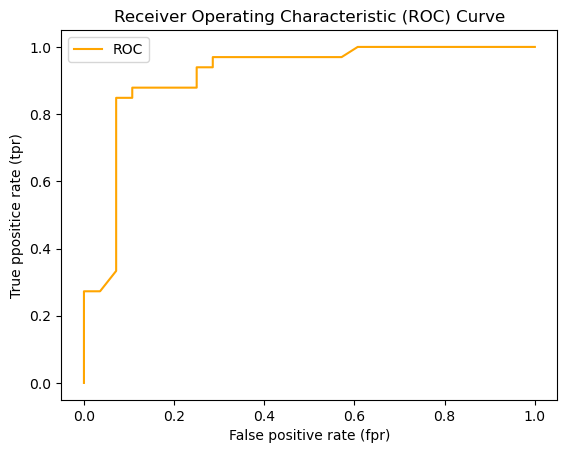

In [116]:
# Create a function for plotting ROC curve

import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr) and true positive rate (tpr) of a model
    """
    # Plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    #Plot line with no predictive power (baseline)
    #plt.plot([0,1], [0,1], color="darkblue", linestyle="--", label="Guessing")

    #Customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True ppositice rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

In [117]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_probs_positive)


0.91504329004329

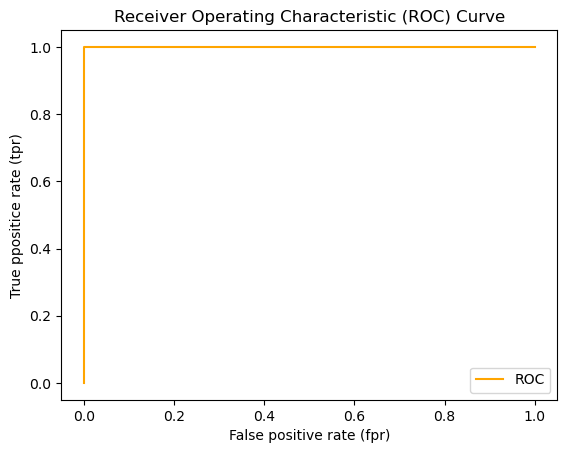

In [118]:
fpr, tpr , thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [119]:
# Perfect AUC score 
roc_auc_score(y_test, y_test)

1.0

**Confusion Matrix**

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.

In essence, giving you an idea where the model is getting confused. 

In [120]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[25,  3],
       [ 4, 29]], dtype=int64)

In [121]:
# Visualize confusion matrix with pd.crosstab()

pd.crosstab(y_test, y_preds, rownames=["Actual Labels"], colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,25,3
1,4,29


In [122]:
21 + 10 + 1 +29

61

<AxesSubplot:>

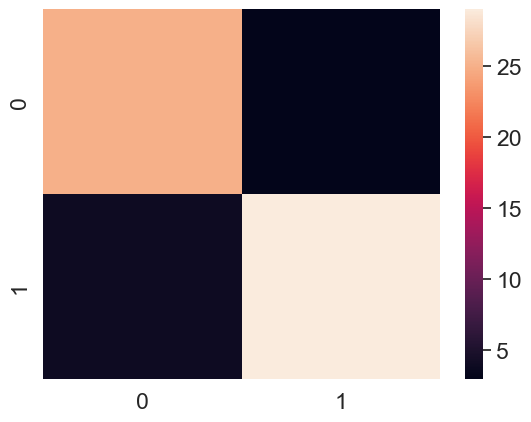

In [123]:
# Make our confusion matrix more visual with Seaborn's heatmap()
import seaborn as sns

# Set the font scale
sns.set(font_scale=1.5)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

# Plot it using seaborn

sns.heatmap(conf_mat)

In [124]:
# Creating a confusion matrix using Sklearn

import sklearn
sklearn.__version__

'1.1.3'

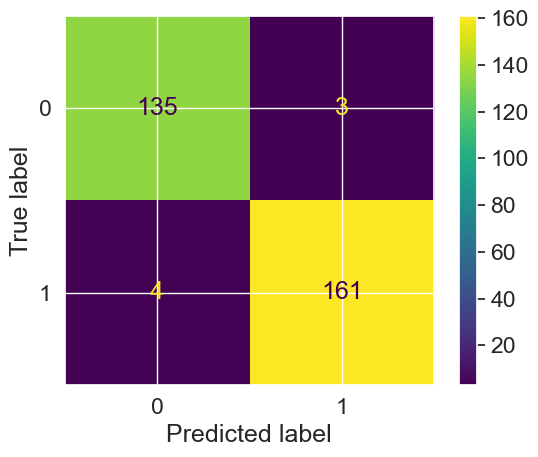

In [125]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator = clf, X=X, y=y)

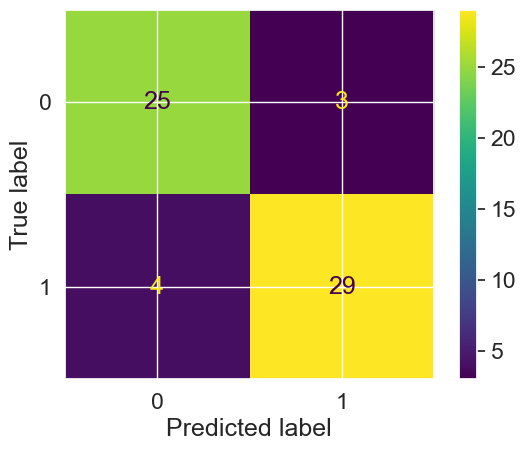

In [126]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred = y_preds)

**Classification Report**


In [127]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88        28
           1       0.91      0.88      0.89        33

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.88        61
weighted avg       0.89      0.89      0.89        61



### 4.2.2 Regression model evaluating metrics

The ones we're going to cover are:
1. R^2 or Coefficiesnt of determination
2. Mean absolute error (MAE)
3. Mean squared error (MSE)

**R2**

In [128]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = df_housing.drop("target", axis=1)
y = df_housing["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

RandomForestRegressor()

In [129]:
model.score(X_test, y_test)

y_pred = model.predict(X_test)

In [130]:
df_housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [131]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: target, Length: 4128, dtype: float64

In [132]:
y_test.mean()

2.0550030959302323

In [133]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())

In [134]:
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [135]:
r2_score(y_true=y_test, y_pred=y_pred)

0.8065734772187598

In [136]:
r2_score(y_true=y_test, y_pred= y_test)

1.0

**Mean absolute error (MAE)**

MAE is the average of the absolute differences between predictiobs and actual values.

It gives you an idea of how wrong your models predictions are.

In [138]:
# MAE
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)

mae

0.32659871732073664

In [139]:
y_preds

array([0.49384  , 0.75494  , 4.9285964, ..., 4.8363785, 0.71782  ,
       1.67901  ])

In [141]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: target, Length: 4128, dtype: float64

In [143]:
df = pd.DataFrame(data ={"actual values": y_test, "prediction values": y_preds})
df["difference"] = df["prediction values"] - df["actual values"] # bunun ortalamaso MAE
df.head(10)

,actual values,prediction values,difference
20046,0.47700,0.493840,0.016840
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.543160,0.357160
9814,2.78000,2.331760,-0.448240
13311,1.58700,1.652530,0.065530
7113,1.98200,2.343230,0.361230
7668,1.57500,1.661820,0.086820
18246,3.40000,2.474890,-0.925110
5723,4.46600,4.834478,0.368478


In [144]:
# MAE using formulas and differences
np.abs(df["difference"]).mean()

0.32659871732073664